### 1)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
%matplotlib inline
df = pd.read_csv("cleaned_sonar.csv")

In [25]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V53,V54,V55,V56,V57,V58,V59,V60,Label,is_M
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      208 non-null    float64
 1   V2      208 non-null    float64
 2   V3      208 non-null    float64
 3   V4      208 non-null    float64
 4   V5      208 non-null    float64
 5   V6      208 non-null    float64
 6   V7      208 non-null    float64
 7   V8      208 non-null    float64
 8   V9      208 non-null    float64
 9   V10     208 non-null    float64
 10  V11     208 non-null    float64
 11  V12     208 non-null    float64
 12  V13     208 non-null    float64
 13  V14     208 non-null    float64
 14  V15     208 non-null    float64
 15  V16     208 non-null    float64
 16  V17     208 non-null    float64
 17  V18     208 non-null    float64
 18  V19     208 non-null    float64
 19  V20     208 non-null    float64
 20  V21     208 non-null    float64
 21  V22     208 non-null    float64
 22  V2

In [27]:
df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V58      0
V59      0
V60      0
Label    0
is_M     0
Length: 62, dtype: int64

### 2)

<AxesSubplot:xlabel='is_M', ylabel='Label'>

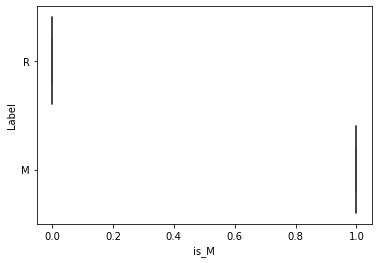

In [28]:
sns.boxplot(x='is_M',y='Label',data=df)

In [7]:
df['is_m']=df['is_M'].map({0: "R",1: "M"})
df['new']=np.where(df['is_m']==df['Label'],'true','false')
df['new'].head()

0    true
1    true
2    true
3    true
4    true
Name: new, dtype: object

### 3)

In [8]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

### 4a)

In [9]:
from sklearn.linear_model import LogisticRegression
df.drop(["is_m","Label","new"],axis=1,inplace = True)
#print(df)
x=df.drop(labels="is_M",axis=1)
y=df['is_M']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [10]:
lo=LogisticRegression()
lo.fit(x_train,y_train)

LogisticRegression()

In [11]:
pred=lo.predict(x_test)
pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
      dtype=int64)

In [12]:
from sklearn.metrics import accuracy_score
acc1=accuracy_score(y_test,pred)
print(acc1)

0.8095238095238095


Logistic regression classifier has 80.95% accuracy

### 4b)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# k=1
n1 = KNeighborsClassifier(n_neighbors=1)
n1.fit(x_train,y_train)
p1=n1.predict(x_test)
print(p1)
acc21=accuracy_score(y_test,p1)
acc21

[1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1
 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0]


0.8412698412698413

In [16]:
#k=2
n2 = KNeighborsClassifier(n_neighbors=2)
n2.fit(x_train,y_train)
p2=n2.predict(x_test)
print(p2)
acc22=accuracy_score(y_test,p2)
acc22

[1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0]


0.8571428571428571

In [17]:
#k=3
n3 = KNeighborsClassifier(n_neighbors=3)
n3.fit(x_train,y_train)
p3=n3.predict(x_test)
print(p3)
acc23=accuracy_score(y_test,p3)
acc23

[1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0]


0.8253968253968254

In [18]:
#k=4
n4 = KNeighborsClassifier(n_neighbors=4)
n4.fit(x_train,y_train)
p4=n4.predict(x_test)
print(p4)
acc24=accuracy_score(y_test,p4)
acc24

[1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0]


0.8571428571428571

In [19]:
#k=5
n5 = KNeighborsClassifier(n_neighbors=5)
n5.fit(x_train,y_train)
p5=n5.predict(x_test)
print(p5)
acc25=accuracy_score(y_test,p5)
acc25

[1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 1
 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0]


0.7777777777777778

Text(0, 0.5, 'accuracy')

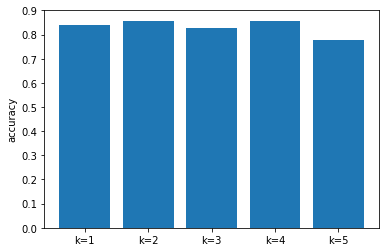

In [20]:
objects = ('k=1','k=2','k=3','k=4','k=5')
y_pos = np.arange(len(objects))
performance = [acc21,acc22,acc23,acc24,acc25]
plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('accuracy')

By loopig k value from k=1 to 5, we can see that accuracy is more when k=2

### 4c)

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
acc3=clf.score(x_test,y_test)
acc3

0.746031746031746

In [22]:
clf.predict(x_test) #prediction of "is_M values"

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0],
      dtype=int64)

Decision tree classifier has less accuracy compared to logistic regression and KNN

### 5)

Text(0, 0.5, 'Accuracy')

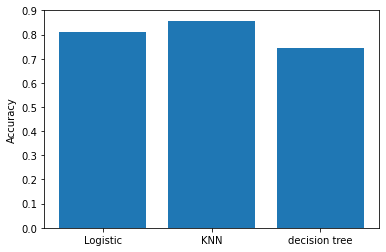

In [23]:
objects = ('Logistic','KNN','decision tree')
y_pos = np.arange(len(objects))
performance = [acc1,acc22,acc3]
plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')

KNN with k value =1 has the highest accuracy.